## （1）对比实验1（处理高斯噪声）

In [7]:
# 导入必要的库
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 配置matplotlib中文显示（避免图表标题、标签中文乱码）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

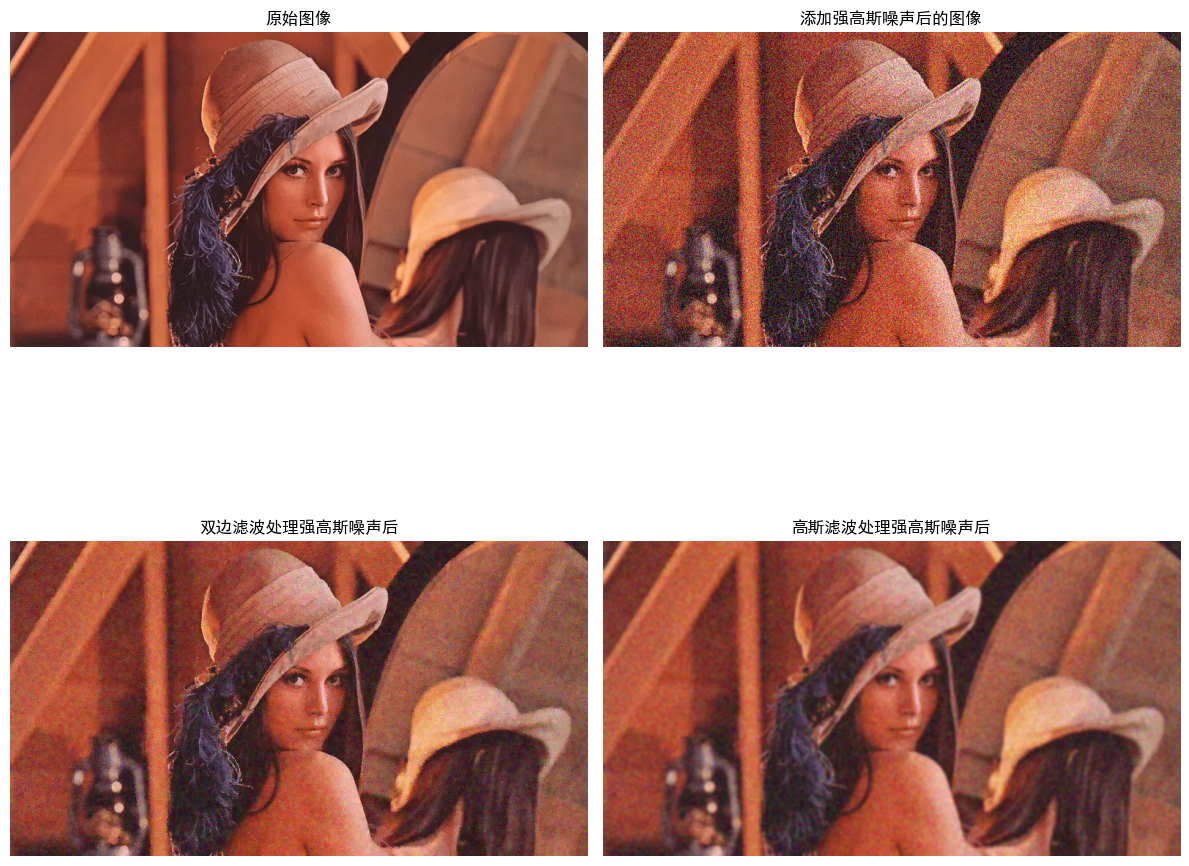

In [8]:
# ##### （1）对比实验1（处理强高斯噪声：双边滤波 vs 高斯滤波）
# 步骤1：读取原始图像
img_path = "../img/lena.jpeg"
img = cv2.imread(img_path)
# 转换颜色空间：BGR（OpenCV默认）→ RGB（matplotlib显示用）
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 步骤2：生成含强高斯噪声的图像（增大方差，噪声更强）
def add_gaussian_noise(image, mean=0, var=0.02):  # var从0.005调整为0.02，噪声强度提升4倍
    """
    给图像添加高斯噪声
    :param image: 输入RGB图像
    :param mean: 噪声均值
    :param var: 噪声方差（值越大，噪声越强）
    :return: 含高斯噪声的图像
    """
    image = np.array(image / 255, dtype=float)  # 归一化到[0,1]
    noise = np.random.normal(mean, var**0.5, image.shape)  # 生成高斯噪声
    noisy_image = image + noise
    # 裁剪到有效像素范围[0,1]，再转换回[0,255] uint8格式
    noisy_image = np.clip(noisy_image, 0, 1)
    noisy_image = np.uint8(noisy_image * 255)
    return noisy_image

# 添加强高斯噪声
img_gaussian_noisy = add_gaussian_noise(img_rgb)
# 转换噪声图像为BGR格式，用于OpenCV滤波处理（保持输入格式一致）
img_gaussian_noisy_bgr = cv2.cvtColor(img_gaussian_noisy, cv2.COLOR_RGB2BGR)

# 步骤3：分别使用双边滤波和高斯滤波处理高斯噪声图像
# 3.1 双边滤波处理（参数：d=9，sigmaColor=75，sigmaSpace=75，经验优值）
img_bilateral_gaussian = cv2.bilateralFilter(img_gaussian_noisy_bgr, d=9, sigmaColor=75, sigmaSpace=75)
img_bilateral_gaussian_rgb = cv2.cvtColor(img_bilateral_gaussian, cv2.COLOR_BGR2RGB)

# 3.2 高斯滤波处理（参数：ksize=(9,9)，sigmaX=0，自动计算标准差，与双边滤波窗口匹配）
img_gaussian_blur = cv2.GaussianBlur(img_gaussian_noisy_bgr, ksize=(9,9), sigmaX=0)
img_gaussian_blur_rgb = cv2.cvtColor(img_gaussian_blur, cv2.COLOR_BGR2RGB)

# 步骤4：可视化对比（2×2布局：原始 → 强高斯噪声 → 双边滤波 → 高斯滤波）
plt.figure(figsize=(12, 12))  # 调整图表尺寸为正方形，适配2×2布局

# 子图1：原始图像（第1行第1列）
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("原始图像")
plt.axis("off")

# 子图2：含强高斯噪声图像（第1行第2列）
plt.subplot(2, 2, 2)
plt.imshow(img_gaussian_noisy)
plt.title("添加强高斯噪声后的图像")
plt.axis("off")

# 子图3：双边滤波处理后（第2行第1列）
plt.subplot(2, 2, 3)
plt.imshow(img_bilateral_gaussian_rgb)
plt.title("双边滤波处理强高斯噪声后")
plt.axis("off")

# 子图4：高斯滤波处理后（第2行第2列）
plt.subplot(2, 2, 4)
plt.imshow(img_gaussian_blur_rgb)
plt.title("高斯滤波处理强高斯噪声后")
plt.axis("off")

# 显示图表
plt.tight_layout()
plt.show()

### （2）对比实验2（处理椒盐噪声）

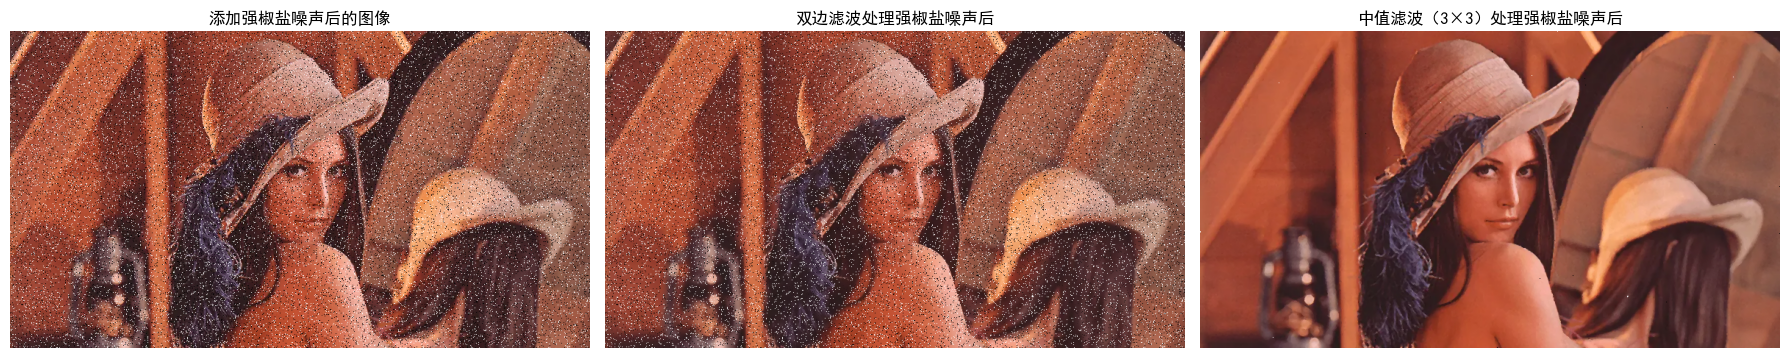

In [9]:
# ##### （2）对比实验2（处理强椒盐噪声：双边滤波 vs 中值滤波）
# 步骤1：生成含强椒盐噪声的图像（增大概率，噪声更强）
def add_salt_pepper_noise(image, prob=0.1):  # prob从0.02调整为0.1，噪声强度提升5倍
    """
    给图像添加椒盐噪声
    :param image: 输入RGB图像
    :param prob: 噪声出现的概率（值越大，噪声越强）
    :return: 含椒盐噪声的图像
    """
    noisy_image = np.copy(image)
    # 计算噪声像素数量
    height, width, _ = noisy_image.shape
    noise_pixel_num = int(prob * height * width)

    # 添加盐噪声（白点，255）
    for _ in range(noise_pixel_num // 2):
        x = np.random.randint(0, height)
        y = np.random.randint(0, width)
        noisy_image[x, y] = [255, 255, 255]

    # 添加椒噪声（黑点，0）
    for _ in range(noise_pixel_num // 2):
        x = np.random.randint(0, height)
        y = np.random.randint(0, width)
        noisy_image[x, y] = [0, 0, 0]

    return noisy_image

# 给原始RGB图像添加强椒盐噪声
img_salt_pepper_noisy = add_salt_pepper_noise(img_rgb)
# 转换噪声图像为BGR格式，用于OpenCV滤波处理
img_salt_pepper_noisy_bgr = cv2.cvtColor(img_salt_pepper_noisy, cv2.COLOR_RGB2BGR)

# 步骤2：分别使用双边滤波和中值滤波处理椒盐噪声图像
# 2.1 双边滤波处理（参数与实验1一致，保持公平性）
img_bilateral_salt_pepper = cv2.bilateralFilter(img_salt_pepper_noisy_bgr, d=9, sigmaColor=75, sigmaSpace=75)
img_bilateral_salt_pepper_rgb = cv2.cvtColor(img_bilateral_salt_pepper, cv2.COLOR_BGR2RGB)

# 2.2 中值滤波处理（作为对比，3×3窗口，处理椒盐噪声最优）
img_median_salt_pepper = cv2.medianBlur(img_salt_pepper_noisy_bgr, 3)
img_median_salt_pepper_rgb = cv2.cvtColor(img_median_salt_pepper, cv2.COLOR_BGR2RGB)

# 步骤3：可视化对比（含强椒盐噪声 vs 双边滤波处理 vs 中值滤波处理）
plt.figure(figsize=(18, 6))

# 子图1：含强椒盐噪声图像
plt.subplot(1, 3, 1)
plt.imshow(img_salt_pepper_noisy)
plt.title("添加强椒盐噪声后的图像")
plt.axis("off")

# 子图2：双边滤波处理后
plt.subplot(1, 3, 2)
plt.imshow(img_bilateral_salt_pepper_rgb)
plt.title("双边滤波处理强椒盐噪声后")
plt.axis("off")

# 子图3：中值滤波处理后
plt.subplot(1, 3, 3)
plt.imshow(img_median_salt_pepper_rgb)
plt.title("中值滤波（3×3）处理强椒盐噪声后")
plt.axis("off")

# 显示图表
plt.tight_layout()
plt.show()